In [109]:
#Import Iris dataset
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

iris =load_iris()
X = iris.data
y = iris.target

In [74]:
#Do basic data pre-processing
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [75]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


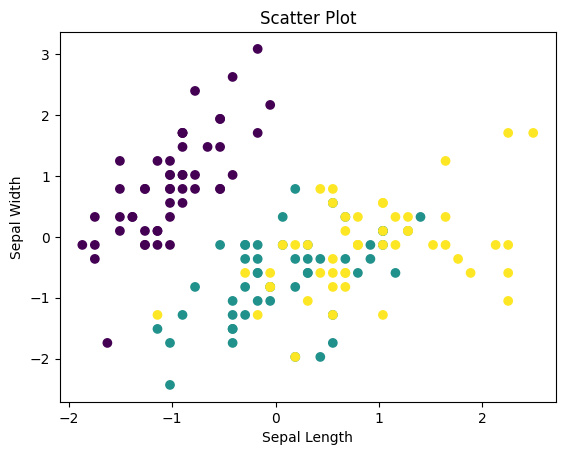

In [102]:
# data visualization
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Scatter Plot')
plt.show()


In [ ]:
# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical.fit(X_scaled)

In [111]:
# Get cluster centroids for K-means
kmeans_centroid_positions = scaler.inverse_transform(kmeans.cluster_centers_)[:, :2]

# Calculate cluster centroids for hierarchical clustering
hierarchical_centroid_positions = []
for cluster_label in np.unique(hierarchical.labels_):
    cluster_points = X[hierarchical.labels_ == cluster_label]
    cluster_centroid = np.mean(cluster_points[:, :2], axis=0)
    hierarchical_centroid_positions.append(cluster_centroid)

hierarchical_centroid_positions = np.array(hierarchical_centroid_positions)
print("K-means:")
print(kmeans_centroid_positions)
print("Hierarchical:")
print(hierarchical_centroid_positions)

K-means:
[[6.78085106 3.09574468]
 [5.006      3.428     ]
 [5.80188679 2.67358491]]
Hierarchical:
[[6.54647887 2.99295775]
 [5.01632653 3.45102041]
 [5.53       2.56666667]]


Text(0.5, 1.0, 'K-means Clustering')

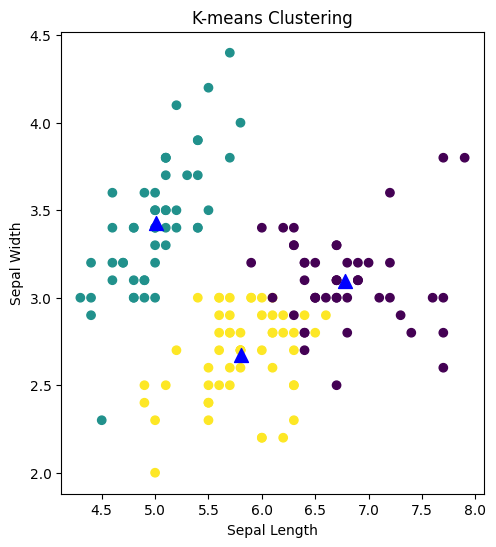

In [112]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)
plt.scatter(kmeans_centroid_positions[:, 0], kmeans_centroid_positions[:, 1], marker='^', c='blue', s=100)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-means Clustering')

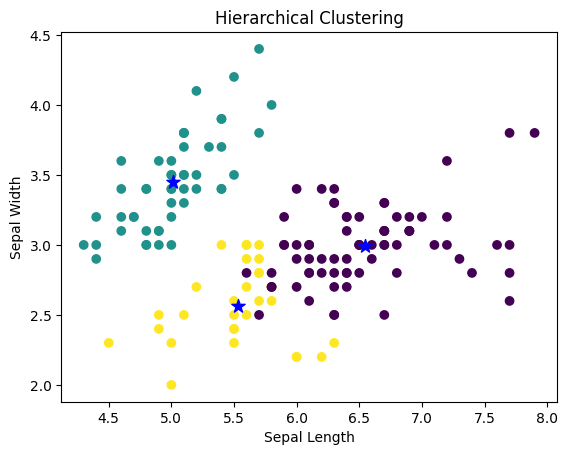

In [114]:

# hierarchical clustering
plt.scatter(X[:, 0], X[:, 1],c=hierarchical.labels_)
plt.scatter(hierarchical_centroid_positions[:, 0], hierarchical_centroid_positions[:, 1], marker='*', c='blue', s=100)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Hierarchical Clustering')
plt.show()


[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]
 [-2.07563095  1.48917752]
 [-2.44402884  0.0476442 ]
 [-2.23284716  0.22314807]
 [-2.33464048 -1.11532768]
 [-2.18432817 -0.46901356]
 [-2.1663101   1.04369065]
 [-2.32613087  0.13307834]
 [-2.2184509  -0.72867617]
 [-2.6331007  -0.96150673]
 [-2.1987406   1.86005711]
 [-2.26221453  2.68628449]
 [-2.2075877   1.48360936]
 [-2.19034951  0.48883832]
 [-1.898572    1.40501879]
 [-2.34336905  1.12784938]
 [-1.914323    0.40885571]
 [-2.20701284  0.92412143]
 [-2.7743447   0.45834367]
 [-1.81866953  0.08555853]
 [-2.22716331  0.13725446]
 [-1.95184633 -0.62561859]
 [-2.05115137  0.24216355]
 [-2.16857717  0.52714953]
 [-2.13956345  0.31321781]
 [-2.26526149 -0.3377319 ]
 [-2.14012214 -0.50454069]
 [-1.83159477  0.42369507]
 [-2.61494794  1.79357586]
 [-2.44617739  2.15072788]
 [-2.10997488 -0.46020184]
 [-2.2078089  -0.2061074 ]
 [-2.04514621  0.66155811]
 

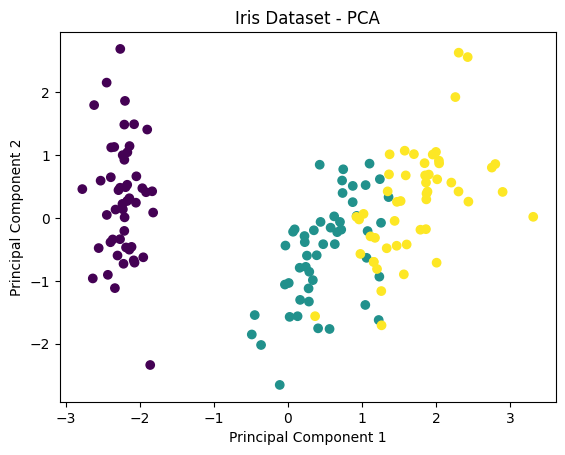

In [117]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)
print(pca_data)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Iris Dataset - PCA')
plt.show()

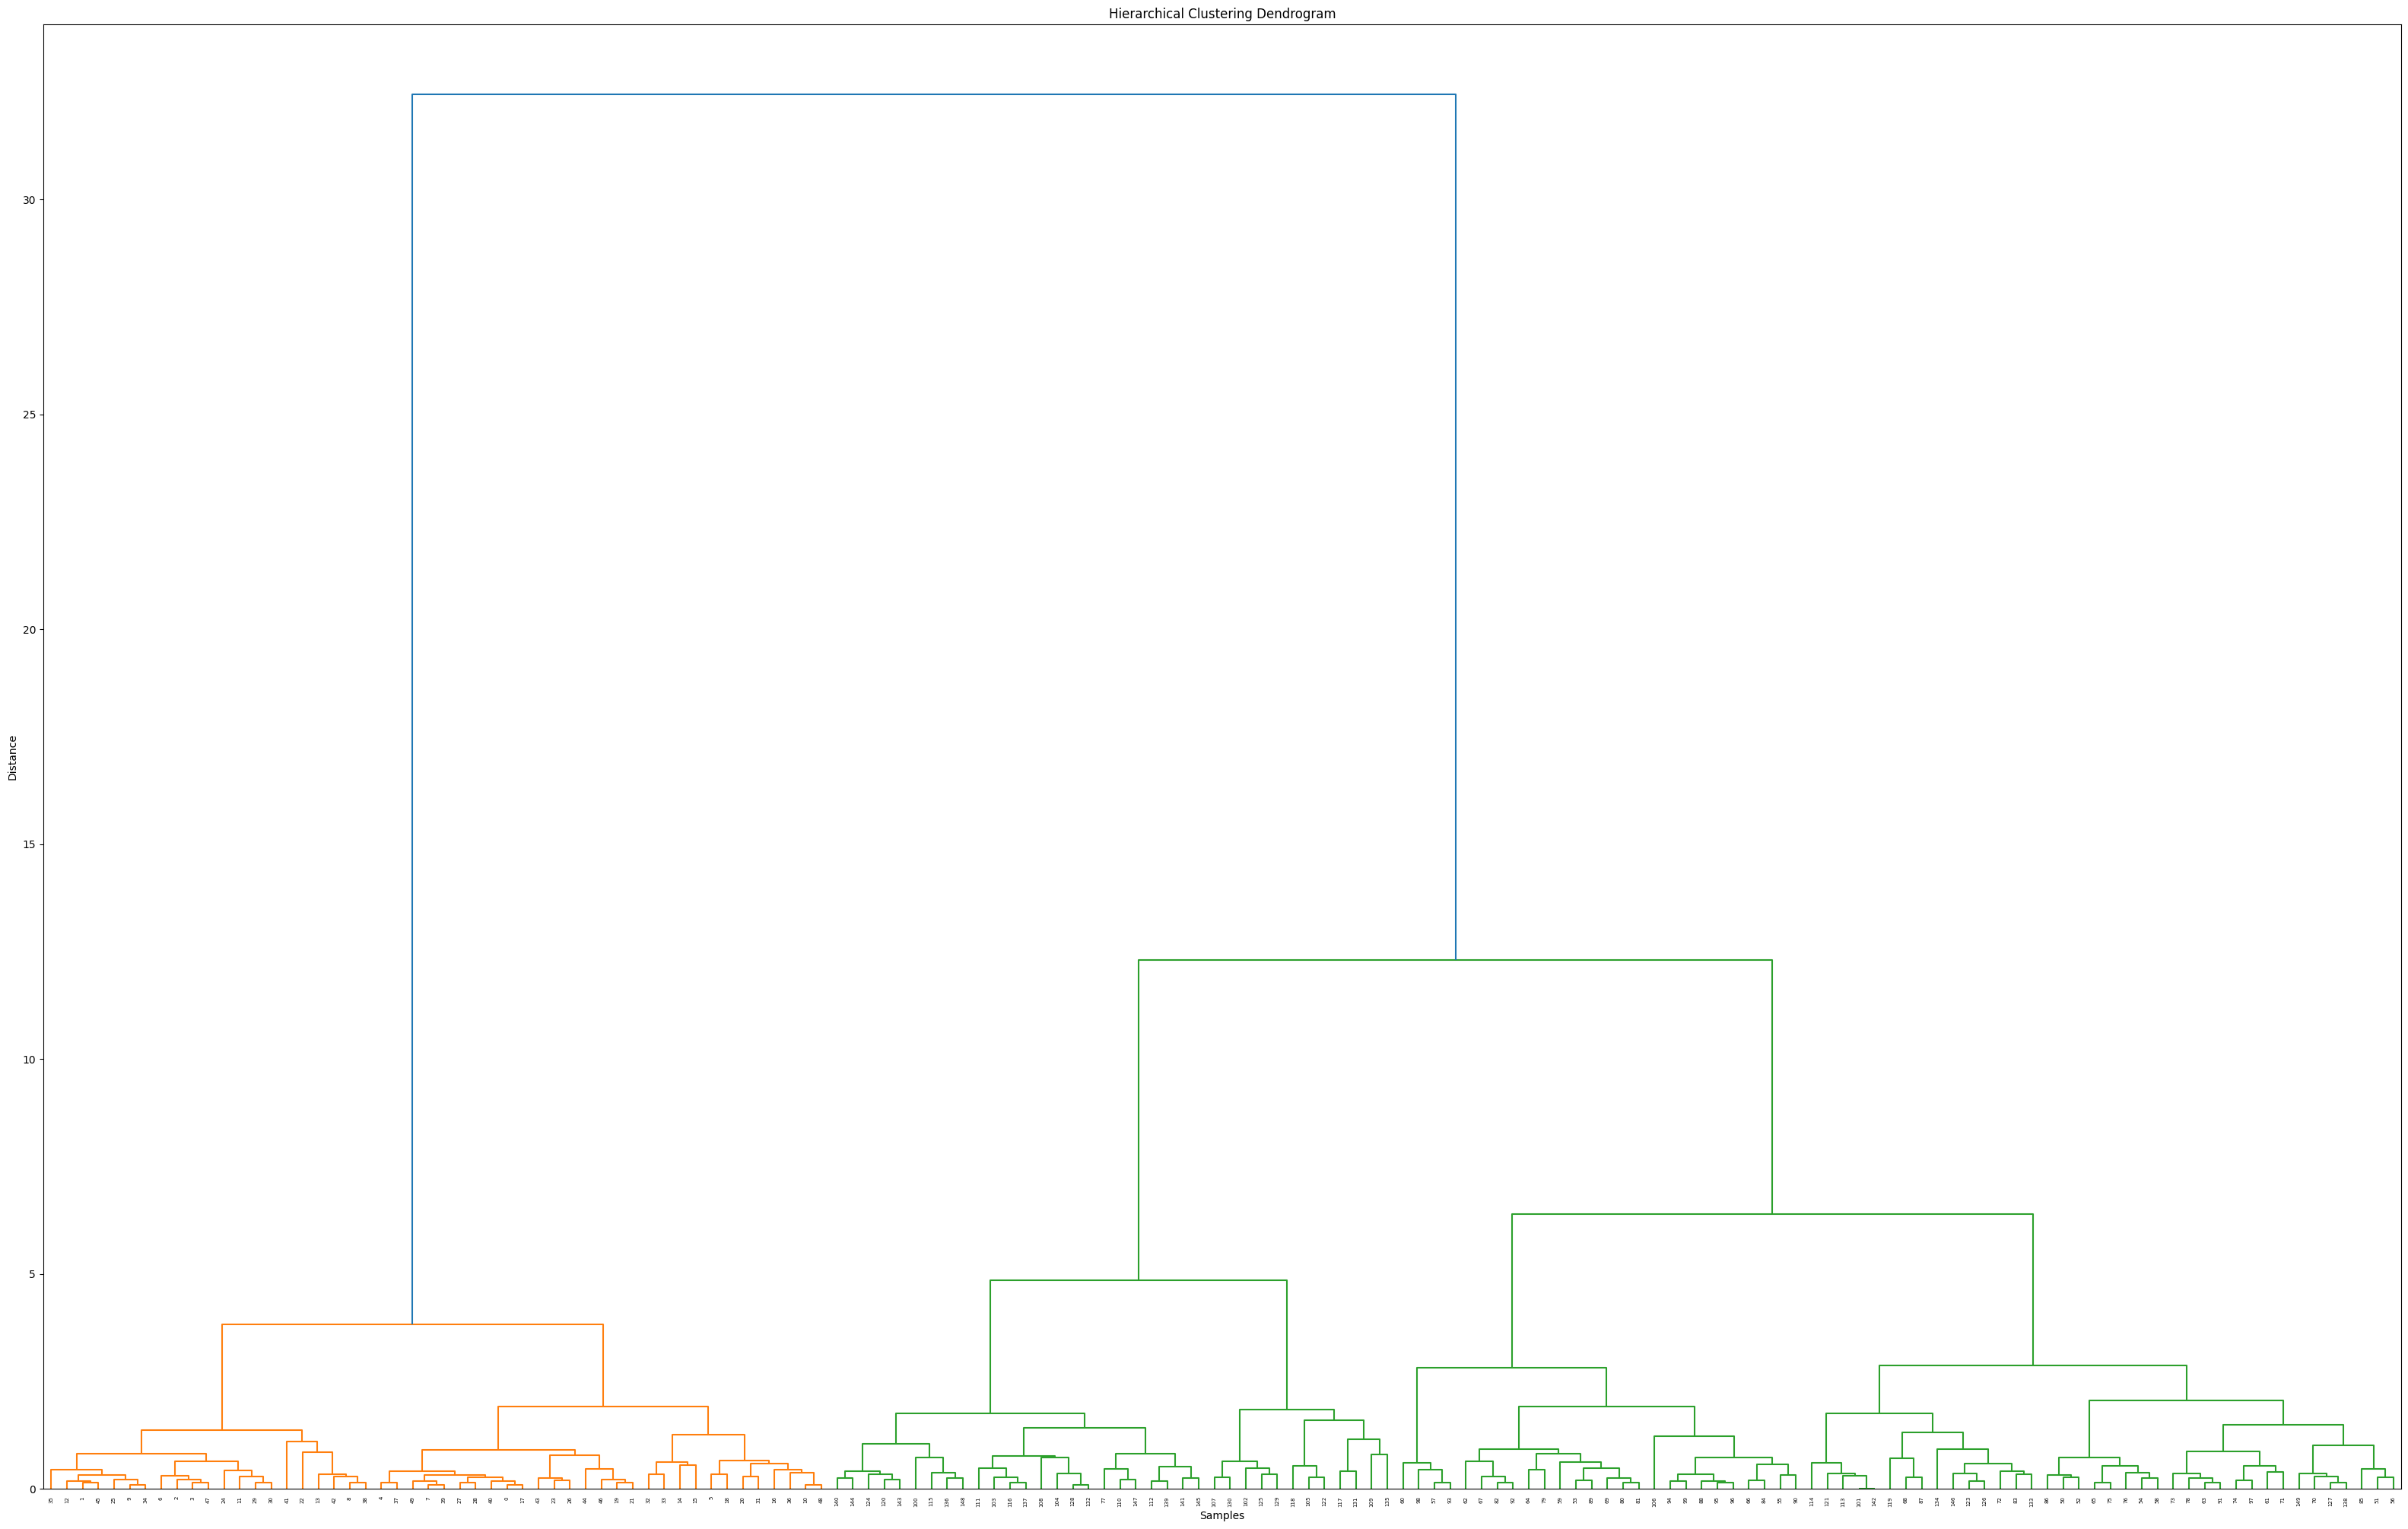

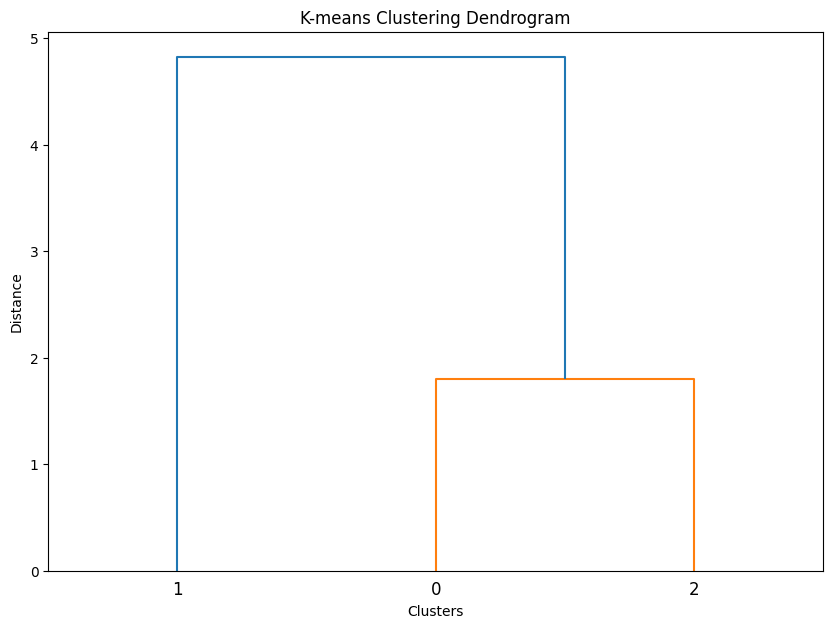

In [119]:
#dendrograms
Z_hierarchical = linkage(X, method='ward')
plt.figure(figsize=(40,25))
dendrogram(Z_hierarchical)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
kmeans.fit(X)

labels_kmeans = kmeans.labels_
distances_kmeans = linkage(kmeans.cluster_centers_, method='ward')

plt.figure(figsize=(10,7))
dendrogram(distances_kmeans)
plt.title('K-means Clustering Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Distance')
plt.show()